# 01 - Documenting your code

**Code documentation is an integral part of the programming process**. In this chapter I give some recommendations about how to write a useful documentation and how specific tools can be used to generate an html documentation for your project.

## Introduction

There are three major components of code documentation:
- **inline comments**: they explain the algorithm and single blocks of code as they are written. They are meant to be read by yourself and other programmers trying to debug and/or understand your code
- **API documentation** (or function / method documentation): explains the purpose of functions or methods, their output, their input variables and their expected types, as well as implementation details if necessary. API stands for [Application Programming Interface](https://en.wikipedia.org/wiki/Application_programming_interface):  API documentation is written for *users* of the function and should be understandable without looking at the code.
- **project documentation**: this encompasses all materials around a project: introductory material, tutorials, online classes, workshops, etc. Without such a project documentation, complex libraries like numpy or pandas would be very difficult to learn.

Writing documentation is like writing tests: it is hard, and represents a lot of work with little immediate reward. **At the very least**, your own code should have inline comments.

## Inline comments 

Inline comments are plain text explanations of your code. As written in [cs.utah.edu](https://www.cs.utah.edu/~germain/PPS/Topics/commenting.html): All programs should be commented in such a manner as to easily describe the purpose of the code and any algorithms used to accomplish the purpose. A user should be able to utilize a previously written program (or function) without ever having to look at the code, simply by reading the comments.

### How to write inline comments

They are often placed at the top of a file (header comments) or before a thematic code block:

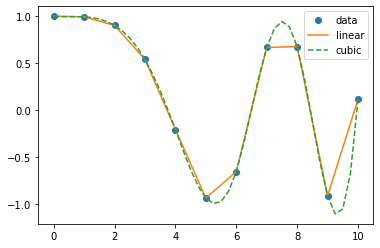

In [1]:
# 1D interpolation example from scipy
# see: https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# We compare two ways to interpolate data (linear and cubic) on a synthetic example
# Inline comments are my own (F. Maussion)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Create synthetic data for the plot
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

# Define two different interpolation functions to compare:
# linear (default) and cubic
fl = interp1d(x, y)
fc = interp1d(x, y, kind='cubic')

# Location at which we want to interpolate
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Compute the interpolated points and plot
plt.plot(x, y, 'o', xnew, fl(xnew), '-', xnew, fc(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best');

As you can see, the comments help to organize the code. The same example without comments is much less engaging:

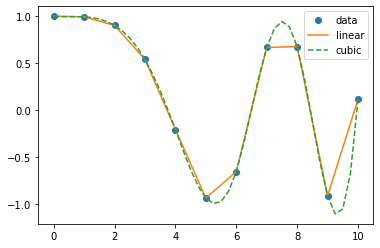

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
fl = interp1d(x, y)
fc = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, fl(xnew), '-', xnew, fc(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best');

Comments can include references to algorithms or indications about who wrote these lines. They should become an automatism when you write code: organize your code in blocks, and comment the purpose of each block. For places which require a bit more explanation, don't hesitate to write several lines of comments.

### How NOT to write inline comments 

Inline comments can be more harmfull than helping. See the following example:

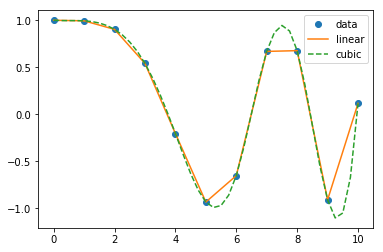

In [3]:
# Numpy tutorial on matrix multiplication
# Author: mowglie
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# linspace between 0 and 10
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)  # apply cosinus

# from documentation: 
# https://docs.numpy.org/doc/numpy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
fl = interp1d(x, y)
fc = interp1d(x, y, kind='cubic')

# linspace between 0 and 10
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Plot
plt.plot(x, y, 'o', xnew, fl(xnew), '-', xnew, fc(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best');

What are the problems here?
1. **Wrong/outdated documentation**: the header inline comments are from a previous file and the documentation link does not work
2. **Commenting the obvious**: paraphrasing the name of the function or its arguments is not helping at all! It is not plain English, and assumes that the reader knows the function and what it does.

Regarding obvious comments, I really like this comic by [Abstruse Goose](https://abstrusegoose.com/432) which I find brings it quite to the point:

![abstruse goose 432](https://abstrusegoose.com/strips/you_down_wit_OPC-yeah_you_know_me.png)

Basically: **think about future readers when writing both code and comments**! And don't forget: this future reader might be *you*, and you'll be thanking yourself.

## API documentation

A [function signature](https://developer.mozilla.org/en-US/docs/Glossary/Signature/Function) (or type signature, or method signature) defines input and output of functions or methods. When writing a function, you expect users (including yourself) to use it more than once, possibly for a longer period of time. Ideally, you would like to understand what a function does *long* after writing it. This is what [docstrings](https://www.python.org/dev/peps/pep-0257/#what-is-a-docstring) are for:

In [3]:
def repeat(phrase, n_times=2, sep=', '):
    """Repeat a phrase a given number of times.
    
    This uses the well known algorithm of string multiplication
    by GvR et al.
    
    Parameters
    ----------
    phrase : str
        The phrase to repat
    n_times : int, optional
        The number of times the phrase should be repeated
    sep : str, optional
        The separator between each repetition
        
    Returns
    -------
    str
        The repeated phrase
        
    Raises
    ------
    ValueError
        When ``phrase`` is not a string
    """
    
    if not isinstance(phrase, str):
        raise ValueError('phrase should be a string!')
    return sep.join([phrase] * n_times)

**Docstrings** have a special meaning in python. They are not used by the language itself, but python offers a way to access them:

In [4]:
print(repeat.__doc__)

Repeat a phrase a given number of times.
    
    This uses the well known algorithm of string multiplication
    by GvR et al.
    
    Parameters
    ----------
    phrase : str
        The phrase to repat
    n_times : int, optional
        The number of times the phrase should be repeated
    sep : str, optional
        The separator between each repetition
        
    Returns
    -------
    str
        The repeated phrase
        
    Raises
    ------
    ValueError
        When ``phrase`` is not a string
    


The dosctring is also read by ipython when calling help (``?``) on a function.

There are no strict rules about how docstrings should be written, but the scientific community has agreed on a convention: [numpydoc](https://numpydoc.readthedocs.io/en/latest/format.html), first written for python and then applied by many other projects in the scientific stack. By complying to this convention you'll make the job of your readers easier.

The convention describes how to describe the input and output variables type as well as other information. More importantly, it can be parsed automatically by doc generators like Sphinx (see below). 

I highly recommend to write numpydoc docstrings for your projects. There is one exception to this recommendation though: **write docstrings only if they are accurate and if you plan to maintain them**. Indeed, **wrong/false documentation is worse than no documentation at all**: it gives others confidence in what your function is supposed to do (a "contract"). If your code does not comply to the contract written in the docstring, this will lead to bugs, deception, and lost of time for users of your code (including yourself).

## Documentation generators

Writing documentation is hard and tedious. It is a task that most people want to avoid, but it is extremely important. In particular in the python world where almost everything is open-source and based on the work of volunteers, documentation might sometimes be neglected.

Fortunately, some tools make it easier for open-source programmers to write documentation.

### Sphinx

[Shpinx](http://www.sphinx-doc.org/) is a tool that makes it easy to create intelligent and beautiful documentation. It can parse your documentation written as text files and convert them to nice, engaging html websites. Importantly, sphinx can parse python code and write an API documentation automatically. 

Many open-source projects use sphinx for their documentation, including numpy and xarray. In the lecture we will make a demo of sphinx by building a project documentation locally.

### ReadTheDocs 

[readthedocs.org](https://readthedocs.org/) is a platform hosting the documentation of open-source projects *for free*. It builds the documentation website using sphinx and actualizes it at each code update. The documentation of the [Open Global Glacier Model](http://docs.oggm.org) or [xarray](http://xarray.pydata.org/) are hosted on ReadTheDocs.

## Interactive tutorials 

Since the rise of jupyter notebooks in recent years, they have proven very useful tools to write engaging tutorials. You can find jupyter notebooks documenting libraries like xarray, or scientific findings like the recent [nobel prize in physics](https://www.numfocus.org/blog/numfocus-projects-featured-in-ligo-gravitational-waves-discovery/).

Thanks to innovative online services, notebook can now be run interactively *in your web browser*: the leading platform to run jupyter notebooks online is [MyBinder](https://mybinder.org/). We use MyBinder to offer online tutorials for our [glacier model](http://edu.oggm.org/en/latest/oggm_tuto.html), for example.

## Take home points 

- write inline comments (always), but write them in a useful way (you will be thanking yourself for this later): do not state the obvious, organize your code in blocks, provide keys to understanding complex code to your readers
- write function docstrings, but only if you plan to take care of them
- a wrong documentation is worse than no documentation, but a good documentation is far better than no documentation